In [81]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn import datasets, svm, metrics, tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.io.arff import loadarff
from sklearn.decomposition import PCA

In [56]:
PhishingData, meta = loadarff('PhishingData.arff')

In [57]:
PhishingData = np.array(map(list, PhishingData), dtype='float64')

In [58]:
PhishingData

array([[ 1., -1.,  1., ...,  1.,  0.,  0.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [ 1., -1.,  0., ...,  1.,  0.,  1.],
       ..., 
       [-1.,  0., -1., ..., -1.,  0.,  1.],
       [ 0.,  0.,  1., ...,  1.,  0.,  1.],
       [ 1.,  0.,  1., ..., -1.,  0., -1.]])

In [59]:
data = PhishingData[:,:-1]

In [60]:
data

array([[ 1., -1.,  1., ...,  1.,  1.,  0.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [ 1., -1.,  0., ..., -1.,  1.,  0.],
       ..., 
       [-1.,  0., -1., ..., -1., -1.,  0.],
       [ 0.,  0.,  1., ..., -1.,  1.,  0.],
       [ 1.,  0.,  1., ..., -1., -1.,  0.]])

In [61]:
target = PhishingData[:,-1]

In [62]:
target

array([ 0.,  1.,  1., ...,  1.,  1., -1.])

In [63]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

In [64]:
kmeans.labels_

array([1, 2, 1, ..., 2, 1, 0], dtype=int32)

In [65]:
clf = svm.SVC(kernel='linear', C=1)

In [66]:
scores = cross_val_score(clf, data, target, cv=10)

In [67]:
scores

array([ 0.79562044,  0.80291971,  0.81617647,  0.84444444,  0.83703704,
        0.85185185,  0.83703704,  0.84444444,  0.86567164,  0.82835821])

In [68]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.04)


In [69]:
predicted = cross_val_predict(clf, data, target, cv=10)

In [70]:
predicted

array([-1.,  1.,  1., ...,  1., -1., -1.])

In [71]:
metrics.accuracy_score(target, predicted) 

0.83222468588322251

In [72]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)


X = data
y = target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'linear', 'C': 1}

Grid scores on development set:

0.541 (+/-0.045) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.174 (+/-0.001) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.553 (+/-0.028) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.542 (+/-0.045) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.659 (+/-0.261) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.552 (+/-0.026) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.794 (+/-0.286) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.659 (+/-0.258) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.795 (+/-0.276) for {'kernel': 'linear', 'C': 1}
0.795 (+/-0.276) for {'kernel': 'linear', 'C': 10}
0.794 (+/-0.271) for {'kernel': 'linear', 'C': 100}
0.793 (+/-0.273) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model is trained on 

In [73]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, target)

In [74]:
scores = cross_val_score(clf, data, target, cv=10)

In [101]:
scores

array([ 0.89051095,  0.83211679,  0.86764706,  0.88888889,  0.93333333,
        0.86666667,  0.88148148,  0.8962963 ,  0.92537313,  0.85820896])

In [75]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.06)


In [76]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("tree.pdf") 

True

In [77]:
from IPython.display import Image 

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data)
pca_2d = pca.transform(data)
import pylab as pl

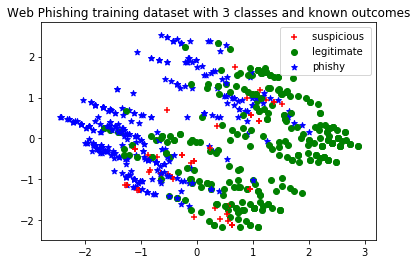

In [96]:
for i in range(0, pca_2d.shape[0]-500):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='o')
    elif y_train[i] == -1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='*')
        
pl.legend([c1, c2, c3], ['suspicious ', 'legitimate',   'phishy'])
pl.title('Web Phishing training dataset with 3 classes and known outcomes')
pl.show()

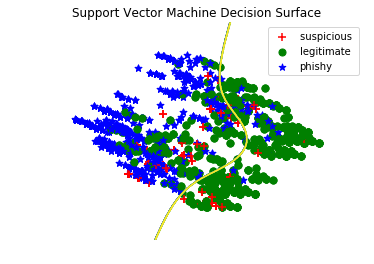

In [103]:
from sklearn.decomposition import PCA
from sklearn import cross_validation
import pylab as pl
import numpy as np

X_train, X_test, y_train, y_test = cross_validation.train_test_split(data, target, test_size=0.10, random_state=111)
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)
svmClassifier_2d = svm.SVC(kernel='poly', degree=3, gamma=0.1, C=C).fit(pca_2d, y_train)
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    s=50,marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    s=50,marker='o')
    elif y_train[i] == -1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    s=50,marker='*')
pl.legend([c1, c2, c3], ['suspicious ', 'legitimate',   'phishy'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
pl.show()